In [2]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [26]:
city_data_to_load = './city_data.csv'
ride_data_to_load = './ride_data.csv'

city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
city_data_complete_df = pd.merge(city_data, ride_data, how='left',
                                on=['city', 'city'])
city_data_complete_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [33]:
city_data_complete_df.rename(columns={'driver_count	' : 'driver_count'})
city_data_complete_df.head()

city             object
driver_count      int64
type             object
date             object
fare            float64
ride_id           int64
dtype: object

In [13]:
avg_fare_df = city_data_complete_df.groupby(['type', 'city'])['fare'].mean().reset_index()
# pd.to_numeric(avg_fare_df['fare'])
new_avg_fare_name_df = avg_fare_df.rename(columns={'fare' : 'average_fare'})
# pd.to_numeric(new_avg_fare_name_df['average_fare'])
new_avg_fare_name_df.head()

,type,city,average_fare
0,Rural,Bradshawfurt,40.064000
1,Rural,Garzaport,24.123333
2,Rural,Harringtonfort,33.470000
3,Rural,Jessicaport,36.013333
4,Rural,Lake Jamie,34.358333


In [41]:
driver_count_df = city_data_complete_df.groupby(['city'])['driver_count'].unique().reset_index()
driver_count_df.head()

,city,driver_count
0,Amandaburgh,[12]
1,Barajasview,[26]
2,Barronchester,[11]
3,Bethanyland,[22]
4,Bradshawfurt,[7]


In [34]:
rides_count_df = city_data_complete_df.groupby(['city'])['ride_id'].count().reset_index()
rides_count_df.head()

,city,ride_id
0,Amandaburgh,18
1,Barajasview,22
2,Barronchester,16
3,Bethanyland,18
4,Bradshawfurt,10


In [30]:
driver_and_ride_df = pd.merge(rides_count_df, driver_count_df, how='left', on=['city'])
driver_and_ride_df.head()

,city,ride_id,driver_count
0,Amandaburgh,18,[12]
1,Barajasview,22,[26]
2,Barronchester,16,[11]
3,Bethanyland,18,[22]
4,Bradshawfurt,10,[7]


In [60]:
grouped_city_summary_df = pd.merge(new_avg_fare_name_df, driver_and_ride_df, how='left', on=['city'])

pd.to_numeric(grouped_city_summary_df['average_fare'])
pd.to_numeric(grouped_city_summary_df['ride_id'])
# pd.to_numeric(grouped_city_summary_df['driver_count'])
grouped_city_summary_df.head()

,type,city,average_fare,ride_id,driver_count
0,Rural,Bradshawfurt,40.064000,10,[7]
1,Rural,Garzaport,24.123333,3,[7]
2,Rural,Harringtonfort,33.470000,6,[4]
3,Rural,Jessicaport,36.013333,6,[1]
4,Rural,Lake Jamie,34.358333,6,[4]


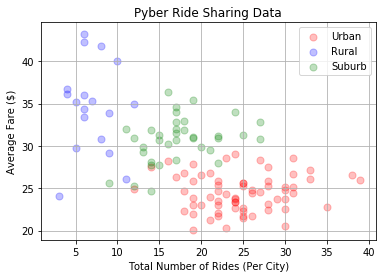

In [160]:
urban_data_df = grouped_city_summary_df.loc[grouped_city_summary_df['type'] == 'Urban']
# urban_data_df
rural_data_df = grouped_city_summary_df.loc[grouped_city_summary_df['type'] == 'Rural']
# rural_data_df
suburb_data_df = grouped_city_summary_df.loc[grouped_city_summary_df['type'] == 'Suburban']
#suburb_data_df

plt.figure()
# x_axis = 'ride_id'
# y_axis = 'average_fare'

plt.scatter(urban_data_df['ride_id'], urban_data_df['average_fare'], color='r', s=50, alpha=0.25, label = 'Urban')
plt.scatter(rural_data_df['ride_id'], rural_data_df['average_fare'], color='b', s=50, alpha=0.25, label = 'Rural')
plt.scatter(suburb_data_df['ride_id'], suburb_data_df['average_fare'], color='g', s=50, alpha=0.25, label = 'Suburb')

plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.title('Pyber Ride Sharing Data')
plt.grid()
lgnd = plt.legend(loc="best", scatterpoints=1, fontsize=10)
plt.savefig('./Images/Pyber_Ride_to_Fare_Compare')

In [114]:
fare_vs_city_type = city_data_complete_df.groupby(['type'])['fare'].sum()
fare_vs_city_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

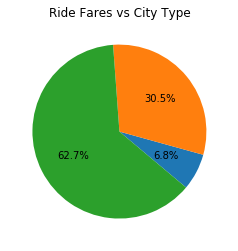

In [162]:
labels = ['Urban', 'Suburban', 'Rural']
#LABELS ARE NOT MATCHING WITH THE CORREC SLICES OF THE PIE, NO MATTER THE ORDER LISED. 
plt.pie(fare_vs_city_type, autopct="%1.1f%%", startangle=320)
plt.title('Ride Fares vs City Type')
plt.savefig('./Images/Pyber_Fares_to_Type_Pie')
plt.show()

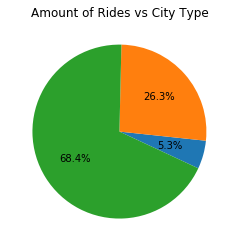

In [163]:
labels = ['Urban', 'Suburban', 'Rural']
#LABELS ARE NOT MATCHING WITH THE CORREC SLICES OF THE PIE, NO MATTER THE ORDER LISED.
rides_vs_city_type = city_data_complete_df.groupby(['type'])['ride_id'].count()
# rides_vs_city_type
plt.pie(rides_vs_city_type, autopct="%1.1f%%", startangle=335)
plt.title('Amount of Rides vs City Type')
plt.savefig('./Images/Pyber_Rides_to_Type_Pie')
plt.show()

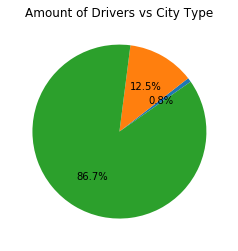

In [164]:
labels = ['Urban', 'Suburban', 'Rural']
#LABELS ARE NOT MATCHING WITH THE CORREC SLICES OF THE PIE, NO MATTER THE ORDER LISED.
drivers_vs_city_type = city_data_complete_df.groupby(['type'])['driver_count'].sum()
drivers_vs_city_type
plt.pie(drivers_vs_city_type, autopct="%1.1f%%", startangle=35)
plt.title('Amount of Drivers vs City Type')
plt.savefig('./Images/Pyber_Drivers_to_Type_Pie')
plt.show()